In [2]:
%pip install shapely

You should consider upgrading via the '/Users/rvlist/.pyenv/versions/adventofcode/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [25]:
from aocd import get_data, submit
import re
import numpy as np

data = get_data(year=2022, day=15)

dist = lambda p1, p2: int(np.linalg.norm(p1-p2, 1))

data = data.splitlines()
data = [re.findall(r"=([-\d]*)", line) for line in data]
data = [list(map(int, d)) for d in data]
data = [[np.array([d[0], d[1]]), np.array([d[2], d[3]])] for d in data]
data = [(p, b, dist(p, b)) for p,b in data]


In [26]:
def merge_ranges(left, right):
    if left.stop >= right.start:
        new_min = min(left.start, left.start)
        new_max = max(left.stop, right.stop)
        return [range(new_min, new_max)]
    return [left, right]
    
    
merge_ranges(range(-4, 0), range(1, 103))

[range(-4, 0), range(1, 103)]

In [29]:
x = [range(5), range(10, 12), range(-4, 10), range(13, 15), range(-10, -7)]
def overlap_ranges(ranges):
    ranges.sort(key=lambda r: min(r))
    output = []
    l = ranges[0]
    for r in ranges[1:]:
        res = merge_ranges(l, r)
        if len(res) == 2:
            l = res[1]
            output.append(res[0])
        else: 
            l = res[0]
    output.append(l)
    return output

In [30]:
y = 2000000
def gen_range(p, d, y):
    y_offset = y - p[1]
    n_x = d-abs(y_offset)
    return range(-n_x + p[0], n_x + 1 + p[0])
    
def ranges_for_row(y):
    ranges = [gen_range(p, d, y) for p, _, d in data if abs(y - p[1]) <= d]
    coverage = overlap_ranges(ranges)
    return coverage

In [31]:
coverage = ranges_for_row(2000000)[0]
answer = coverage.stop - coverage.start - 1
answer

5511201

In [32]:
submit(answer, year=2022, part="a", day=15)

Part a already solved with same answer: 5511201


## Runs in 286 ms which is quite nice, but no way that that will work for 4 million rows 

In [33]:
%timeit ranges_for_row(2000000)

284 ms ± 9.41 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## We'll treat the range of each sensor as a diamond shaped area, intersect all areas and find the interior of that shape. Only space for the distress beacon to hide 

In [34]:
import shapely
from shapely.geometry import Polygon
from shapely.ops import unary_union

def make_polygon(d):
    p, _, radius = d
    points = p + np.array([[0,radius], [radius,0], [0,-radius], [-radius,0]])
    points = [tuple(p) for p in points]
    return Polygon(points)

polygons = [make_polygon(d) for d in data]
all_coverages = unary_union(polygons)

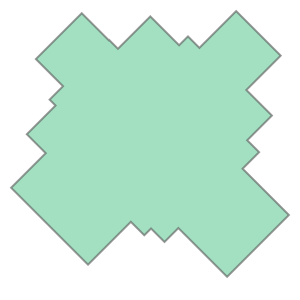

In [35]:
all_coverages

In [36]:
def get_middle(coords):
    coords = list(set(coords))
    coords.sort()
    return int(coords[len(coords)//2])
int_x, int_y = all_coverages.interiors[0].coords.xy
beacon_x = get_middle(int_x)
beacon_y = get_middle(int_y)

In [37]:
answer = beacon_x*4000000 + beacon_y
answer

11318723411840

In [38]:
submit(answer, year=2022, part="b", day=15)

Part b already solved with same answer: 11318723411840
